# Exercises - Explore
### Our scenario continues:
*As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.*

#### Create a file, explore.py, that contains the following functions for exploring your variables (features & target).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale
import explore

In [2]:
df=wrangle.wrangle_telco()
print(f'df: {df.shape}, type {type(df)}')
train, test = split_scale.split_my_data_whole(df)
print()
print(f'train: {train.shape}, type {type(train)}')
print()
print(f'test: {test.shape}, type {type(test)}')
df.head(5)

df: (1685, 3), type <class 'pandas.core.frame.DataFrame'>

train: (1263, 3), type <class 'pandas.core.frame.DataFrame'>

test: (422, 3), type <class 'pandas.core.frame.DataFrame'>


,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


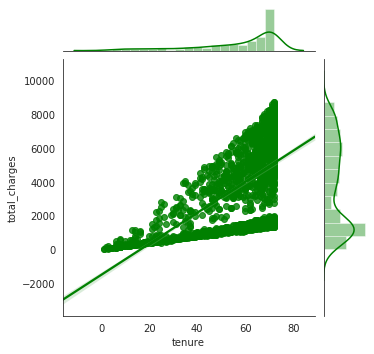

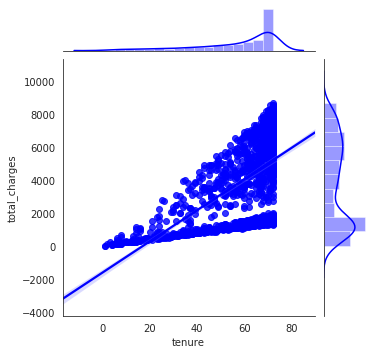

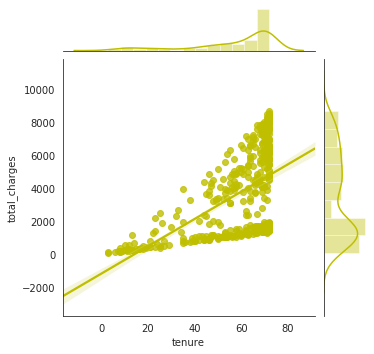

In [3]:
with sns.axes_style('white'):
    j1 = sns.jointplot("tenure", "total_charges", data=df, kind='reg', height=5, color='g');
    j2 = sns.jointplot("tenure", "total_charges", data=train, kind='reg', height=5, color='b');
    j3 = sns.jointplot("tenure", "total_charges", data=test, kind='reg', height=5, color='y');
    
plt.show()

1. **Write a function,** 
`plot_variable_pairs(dataframe) 
**that plots all of the pairwise relationships along with the regression line for each pair.**

In [4]:
def plot_variable_pairs(dataframe):
    g = sns.PairGrid(dataframe)
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)

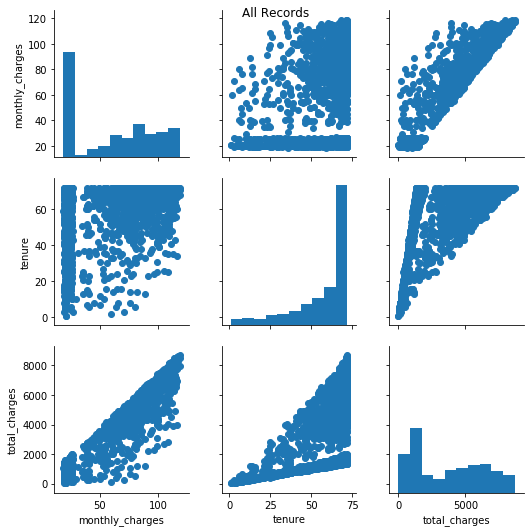

In [5]:
explore.plot_variable_pairs(df)
plt.suptitle('All Records')
plt.show()

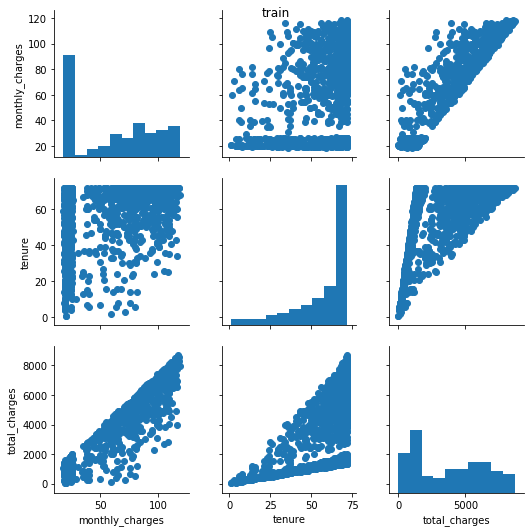

In [6]:
explore.plot_variable_pairs(train)
plt.suptitle('train')
plt.show()

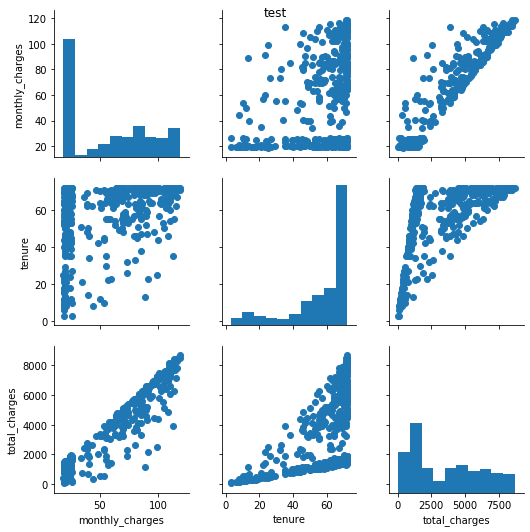

In [7]:
explore.plot_variable_pairs(test)
plt.suptitle('test')
plt.show()

2. **Write a function,** 
`months_to_years(tenure_months, df)` 
**that returns your dataframe with a new feature tenure_years, in complete years as a customer.**

In [8]:
def months_to_years(tenure_months, df):
    newdf = pd.DataFrame(df)
    ty = tenure_months.apply(lambda x: int(x / 12)).astype('category')
    newdf['tenure_years'] = ty
    return newdf

In [9]:
print(df.head(5))
newdf = explore.months_to_years(df.tenure,df)
print(newdf.head(5))
print(newdf.dtypes)

             monthly_charges  tenure  total_charges
customer_id                                        
0013-SMEOE            109.70      71        7904.25
0014-BMAQU             84.65      63        5377.80
0016-QLJIS             90.45      65        5957.90
0017-DINOC             45.20      54        2460.55
0017-IUDMW            116.80      72        8456.75
             monthly_charges  tenure  total_charges  tenure_years
customer_id                                                      
0013-SMEOE            109.70      71        7904.25             5
0014-BMAQU             84.65      63        5377.80             5
0016-QLJIS             90.45      65        5957.90             5
0017-DINOC             45.20      54        2460.55             4
0017-IUDMW            116.80      72        8456.75             6
monthly_charges    float64
tenure               int64
total_charges      float64
tenure_years         int64
dtype: object


3. **Write a function,** 
`plot_categorical_and_continous_vars(categorical_var, continuous_var, df)`
**, that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges.**

In [10]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    xvals=categorical_var
    yvals=continuous_var
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    p1 = sns.barplot(x=xvals, y=yvals, data=df)
    plt.subplot(1,3,2)
    p2 = sns.boxplot(x=xvals, y=yvals, data=df)
    plt.subplot(1,3,3)
    p3 = sns.stripplot(x=xvals, y=yvals, data=df)
    plt.show()
#    return p1, p2, p3

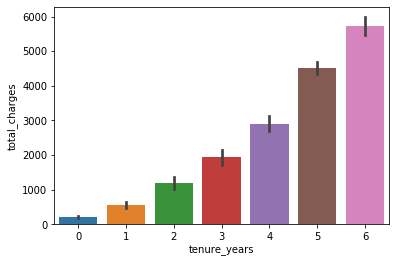

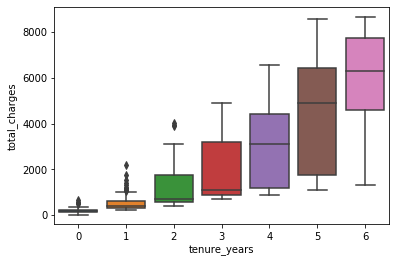

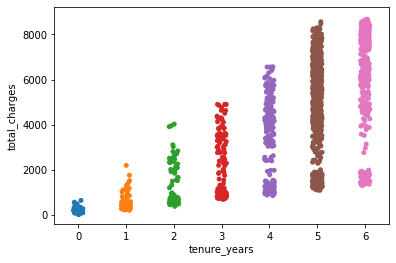

In [11]:
p1 = explore.plot_categorical_and_continuous_vars(newdf.tenure_years, newdf.total_charges, newdf)

*For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.*